# Reweighting Schemes

So I started some exploratory plots in the `Hybrid-Training` notebook, but the purpose of this notebook is to compare different reweighting schemes for the ttbar and hybrid files.

**Table of Contents**
1. Pub note claim: ttbar comparison
2. Comparison with hybrid sample


In [3]:
import numpy as np
import h5py
import sys
import pandas as pd
import xarray as xr

sys.path.append("../..")
from usefulFcts import *
from trainNet import *
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Step 1:** Load in the $t\bar{t}$ test set.

In [5]:
dataDir = '../../data/mc16d_PFlow_ttbar'
vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
dataTag = "2mtest_15trks_{}_sd0_rev_{}_scale".format(vStr,HYBRID_SAMPLE)

f_name = "{}/data_{}.hdf5".format(dataDir,dataTag)

f = h5py.File(f_name,"r")

X = f['X_test'][:]
y = f['y_test'][:]
ix = f['ix_test'][:]

f.close()

nTest,nTrks,nFeatures = X.shape

Access all of the models that you're going to want to compare in this notebook, since a lot of this code is common between the sections.

Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


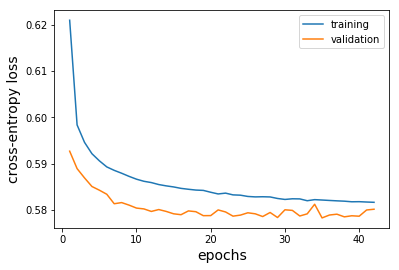

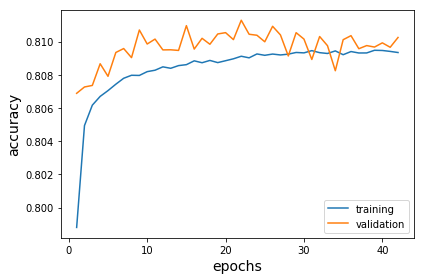

LSTM_50units_10dense_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev
Load in the previously saved efficiency file
Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


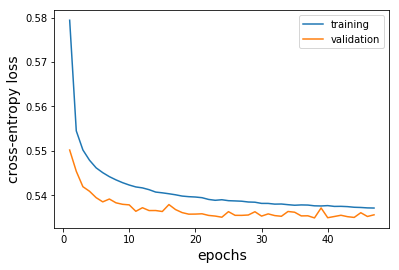

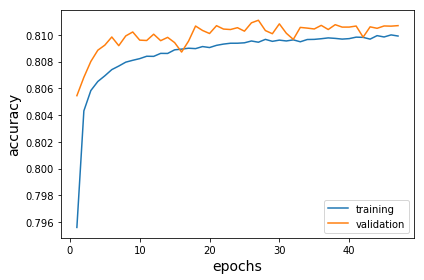

LSTM_50units_10dense_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_rwt-b
Load in the previously saved efficiency file
Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


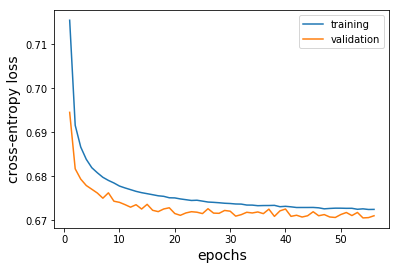

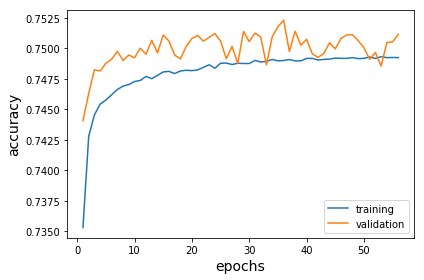

LSTM_50units_10dense_4mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev
Load in the previously saved efficiency file
Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


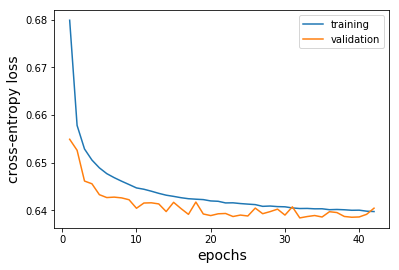

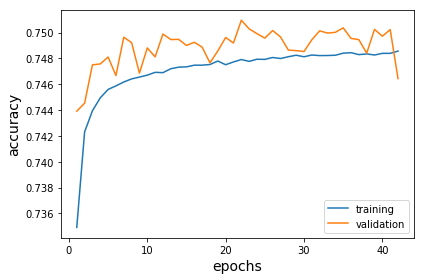

LSTM_50units_10dense_4mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_rwt-b
Load in the previously saved efficiency file


In [21]:
leffs, ceffs, beffs = [],[],[]
figDir = '../../figures/'

'''
I ended up using more statistics for the hybrid training, since extending
the pT range might have made it a harder problem.
'''
for physicsCollection, nMillion in zip(['ttbar','hybrid_1.5TeV'],[3,4]):

    subDir = 'mc16d_PFlow_{}'.format(physicsCollection)
    modelDir = '../../models/'+subDir

    for rwtTag in ['','_rwt-b']:

        dataTagTrain = "{}mtrain_15trks_{}_sd0_rev{}".format(nMillion,vStr,rwtTag)

        m = myLSTM(modelDir=modelDir, nFeatures=nFeatures, dataTag=dataTagTrain, loadModel=True)
        print(m.modelName)
        trainingMetrics(m.modelName,modelDir=modelDir)
        
        # Get the efficiencies
        leff, ceff, beff = getEffs(m, X, y, ix, figDir=figDir,subDir=subDir,modelDir=modelDir)

        leffs.append(leff)
        ceffs.append(ceff)
        beffs.append(beff)

**Step 2:** Compare the models *trained on $t\bar{t}$* evaluated on $t\bar{t}$.

../../plottingFcts.py:549: RuntimeWarning: invalid value encountered in sqrt
  eff_err = lambda x, N: np.sqrt( x*(1-x) / N)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: invalid value encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:117: RuntimeWarning: invalid value encountered in multiply
  d = ((2*h0 + h1)*m0 - h0*m1) / (h0 + h1)


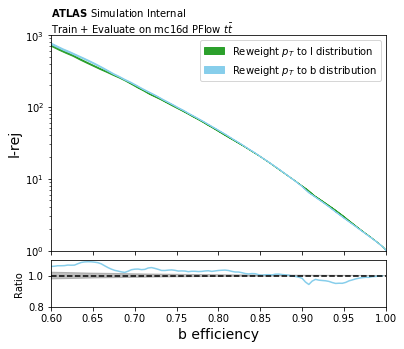

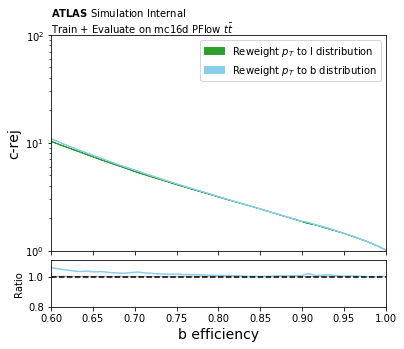

In [24]:
labels=['Reweight $p_T$ to {} distribution'.format(x) for x in ['l','b']]
plotTag = 'rej_cf_rwt-b'

text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"Train + Evaluate on mc16d PFlow $t\bar{t}$"

subDir = 'mc16d_PFlow_ttbar'
colors = ['C2','skyblue']

plotROCRatio(beffs[:2], leffs[:2], labels, rrange=(0.8,1.1),ymax=1000,
             text=text,ylabel='l-rej',binomialErrors=True,nTest=nTest, 
             colors=colors, figDir=figDir,
             subDir=subDir,tag='l'+plotTag)

plotROCRatio(beffs[:2], ceffs[:2], labels, rrange=(0.8,1.11),ymax=100,
             text=text,ylabel='c-rej',binomialErrors=True,nTest=nTest, 
             colors=colors, figDir=figDir,
             subDir=subDir,tag='c'+plotTag)

**Step 3:** Compare the hybrid training models, again evaluating on $t\bar{t}$.

../../plottingFcts.py:549: RuntimeWarning: invalid value encountered in sqrt
  eff_err = lambda x, N: np.sqrt( x*(1-x) / N)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:117: RuntimeWarning: invalid value encountered in multiply
  d = ((2*h0 + h1)*m0 - h0*m1) / (h0 + h1)


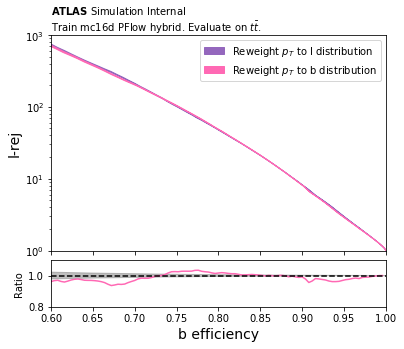

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: invalid value encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk


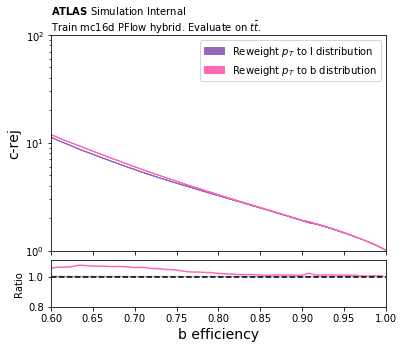

In [23]:
text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"Train mc16d PFlow hybrid. Evaluate on $t\bar{t}$."

subDir = 'mc16d_PFlow_hybrid_1.5TeV'
colors = ['C4','hotpink']

plotROCRatio(beffs[2:], leffs[2:], labels, rrange=(0.8,1.1),ymax=1000,
             text=text,ylabel='l-rej',binomialErrors=True,nTest=nTest, 
             colors=colors, figDir=figDir,
             subDir=subDir,tag='l'+plotTag)

plotROCRatio(beffs[2:], ceffs[2:], labels, rrange=(0.8,1.11),ymax=100,
             text=text,ylabel='c-rej',binomialErrors=True,nTest=nTest, 
             colors=colors, figDir=figDir,
             subDir=subDir,tag='c'+plotTag)

To me, it seems like this really is not going to be a dominant effect.

Something else that I could look into is looking at plotting these sample weights for this new version of the $p_T$s?